# day43

- 전력 수요 예측 모델(RNN)
- seq 2 seq 
- auto encoder(GAN)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np

- date time index


In [5]:
dataStr=['2019, 9, 5','2019, 9, 6','2019, 9, 7','2019, 9, 8']
idx = pd.to_datetime(dataStr) 
# to_datetime : 날짜나 시간을 나타내는 문자열을 datetime 인덱스를 생성해준다
# to_datetime 함수 : (문자열) => datetime[자료형] => DatetimeIndex
idx
s = pd.Series(np.random.randn(4), index=idx) # datetime index를 붙여
s

2019-09-05   -1.607482
2019-09-06   -0.420152
2019-09-07   -0.113979
2019-09-08   -0.345328
dtype: float64

In [6]:
pd.date_range('2019-9-5', '2019-9-30') 
# '2019-9-5', '2019-9-30' 사이 DatetimeIndex부여 
# 시계열 data
# 동일 구문
pd.date_range(start = '2019-9-5', end = '2019-9-30') 
pd.date_range(start = '2019-9-5', periods = 30) 

pd.date_range(start = '2019-9-5', periods = 30, freq ='W') # 주단위 도출

DatetimeIndex(['2019-09-08', '2019-09-15', '2019-09-22', '2019-09-29',
               '2019-10-06', '2019-10-13', '2019-10-20', '2019-10-27',
               '2019-11-03', '2019-11-10', '2019-11-17', '2019-11-24',
               '2019-12-01', '2019-12-08', '2019-12-15', '2019-12-22',
               '2019-12-29', '2020-01-05', '2020-01-12', '2020-01-19',
               '2020-01-26', '2020-02-02', '2020-02-09', '2020-02-16',
               '2020-02-23', '2020-03-01', '2020-03-08', '2020-03-15',
               '2020-03-22', '2020-03-29'],
              dtype='datetime64[ns]', freq='W-SUN')

In [7]:
# SHIFT 연산 : 인덱스는 그대로 두고 data만 이동시키는 작업
s = pd.Series(np.random.randn(5), index = pd.date_range('2019-9-5', periods=5))
s.shift(1) # data 값에 NAN이 채워지고 하나씩 밀려내려간다
s.shift(2)
s.shift(-2) # 방향도 설정가능 ( 데이터 분석 작업에서 사용가능 )

2019-09-05   -0.864263
2019-09-06    0.811165
2019-09-07   -0.983935
2019-09-08         NaN
2019-09-09         NaN
Freq: D, dtype: float64

In [8]:
s2 = pd.Series(np.random.randn(100), index = pd.date_range('2019-9-5', periods=100))
s2

2019-09-05   -1.379150
2019-09-06   -0.808033
2019-09-07    0.082721
2019-09-08    1.062659
2019-09-09   -0.043942
2019-09-10    0.829540
2019-09-11    1.649333
2019-09-12    0.361317
2019-09-13   -0.022830
2019-09-14   -1.211458
2019-09-15    0.309273
2019-09-16    0.258193
2019-09-17   -0.849039
2019-09-18   -0.512601
2019-09-19   -1.506201
2019-09-20   -0.475768
2019-09-21   -1.980438
2019-09-22    0.009260
2019-09-23    2.366961
2019-09-24   -1.518190
2019-09-25   -0.733495
2019-09-26    1.719430
2019-09-27   -2.005530
2019-09-28    1.522278
2019-09-29    0.231691
2019-09-30   -0.227431
2019-10-01    1.174106
2019-10-02    0.225094
2019-10-03    0.019599
2019-10-04   -1.030302
                ...   
2019-11-14   -1.058135
2019-11-15   -0.477097
2019-11-16    0.038619
2019-11-17   -0.538478
2019-11-18   -0.058778
2019-11-19    0.325051
2019-11-20    0.887064
2019-11-21    0.624459
2019-11-22    0.573256
2019-11-23    0.777667
2019-11-24   -0.123043
2019-11-25    0.188061
2019-11-26 

리샘플링 
- 업 샘플링 ( 샘플링 : 데이터 양, 증가 ) : 시간 구간이 작아지면
- 다운 샘플링 ( 샘플링 : 데이터 양, 감소 ) : 시간 구간이 커지면


In [9]:
s2.resample("W").mean() # week 단위로 데이터를 양산해라 
# 9 월 5일 부터 주단위로 양산, 평균이 도출
# 1주일 데이터에 대해서 평균을 지니 대표값들을 도출
# such as ) week unit group by => mean 


2019-09-08   -0.260451
2019-09-15    0.267319
2019-09-22   -0.722370
2019-09-29    0.226164
2019-10-06   -0.016982
2019-10-13   -0.112300
2019-10-20   -0.047466
2019-10-27   -0.064750
2019-11-03   -0.577157
2019-11-10    0.235816
2019-11-17   -0.572629
2019-11-24    0.429382
2019-12-01    0.108041
2019-12-08   -0.489233
2019-12-15   -0.031921
Freq: W-SUN, dtype: float64

In [10]:
s2.resample("M").first()
# 월단위로 groupby, first() => 데이터 대표값설정, 축소가능 


2019-09-30   -1.379150
2019-10-31    1.174106
2019-11-30   -1.290802
2019-12-31   -0.515164
Freq: M, dtype: float64

## 전력수요예측 data 읽어오기

In [11]:
path="C:/Users/user/Desktop/to/household_power.txt"
df=pd.read_csv(path, sep=";", low_memory=False,
               index_col = 'dt', parse_dates={"dt":['Date','Time']}, 
               na_values=['nan','?'])
# low_memory : data 불러들이는 속도 향상 # 어떤 걸 na로 할지 설정 
df
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [12]:
# dataframe
print(df.dtypes)
print("*"*72)
print(df.shape)
print("*"*72)
print(df.describe()) # 기술통계 // count mean 표준편차  등등 구할수 있는 작업함수 
print("*"*72)
print(df.columns)

# 결측치 관련 


Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object
************************************************************************
(2075259, 7)
************************************************************************
       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [14]:
df.Global_active_power

dt
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
2006-12-16 17:29:00    3.520
2006-12-16 17:30:00    3.702
2006-12-16 17:31:00    3.700
2006-12-16 17:32:00    3.668
2006-12-16 17:33:00    3.662
2006-12-16 17:34:00    4.448
2006-12-16 17:35:00    5.412
2006-12-16 17:36:00    5.224
2006-12-16 17:37:00    5.268
2006-12-16 17:38:00    4.054
2006-12-16 17:39:00    3.384
2006-12-16 17:40:00    3.270
2006-12-16 17:41:00    3.430
2006-12-16 17:42:00    3.266
2006-12-16 17:43:00    3.728
2006-12-16 17:44:00    5.894
2006-12-16 17:45:00    7.706
2006-12-16 17:46:00    7.026
2006-12-16 17:47:00    5.174
2006-12-16 17:48:00    4.474
2006-12-16 17:49:00    3.248
2006-12-16 17:50:00    3.236
2006-12-16 17:51:00    3.228
2006-12-16 17:52:00    3.258
2006-12-16 17:53:00    3.178
                       ...  
2010-11-26 20:33:00    0.978
2010-11-26 20:34:00    0.968
2010-11-26 20:35:00    0.960
2010-11-26 

### data 에 대한 탐색적 분석 ( EDA ) 시작

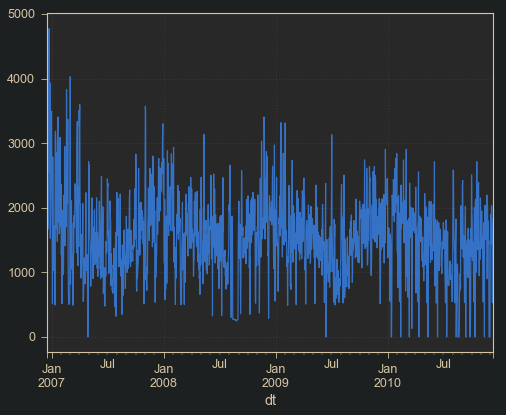

In [15]:
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd', context='paper', spines=True, 
             ticks=True, grid=True, gridlines='dotted', figsize=(10,7.8))

df.Global_active_power.resample('D').sum().plot() # day가 기준이된다 
# data가 day 단위로 sum 되어서 시각화되어짐
# => 하루동안의 전력소비량의 합계가 구해져서 도출되어짐

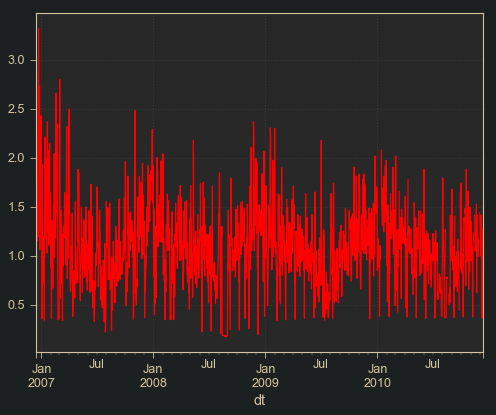

In [16]:
df.Global_active_power.resample('D').mean().plot(color='red')
# y축 값이 이전의 sum과 다르다 
# mean값이 하루단위로 전력소비량의 평균이 도출됨 


In [17]:
# plot창을 위아래 두개로나눠서 표현해보자 
print(df.Global_intensity.head())
r = df.Global_intensity.resample('D').agg(['mean','std'])
r


dt
2006-12-16 17:24:00    18.4
2006-12-16 17:25:00    23.0
2006-12-16 17:26:00    23.0
2006-12-16 17:27:00    23.0
2006-12-16 17:28:00    15.8
Name: Global_intensity, dtype: float64


,mean,std
dt,,
2006-12-16,13.082828,4.283262
2006-12-17,9.999028,5.031445
2006-12-18,6.421667,4.248511
2006-12-19,4.926389,5.238010
2006-12-20,6.467361,5.556587
2006-12-21,5.033797,4.209510
2006-12-22,6.872917,6.080840
2006-12-23,14.028056,6.194776
2006-12-24,7.640417,5.324093


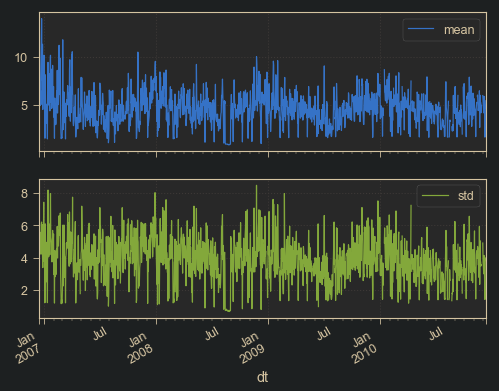

In [18]:
r.plot(subplots=True) # 평균 / 표준편차 
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

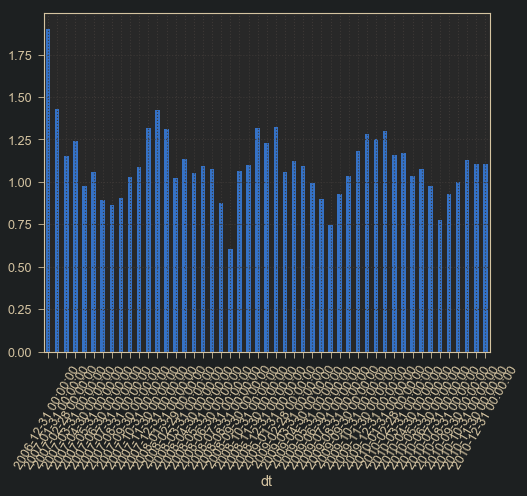

In [19]:
# 월단위로 전력소비량 분포 / 주단위로 
df['Global_active_power'].resample('M').mean().plot(kind='bar')
## 글씨 보기 흉해
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

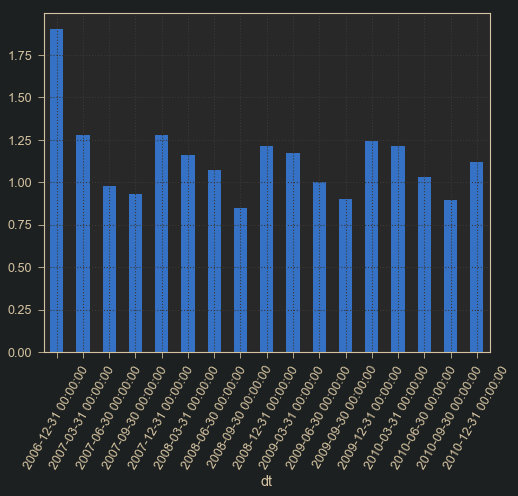

In [20]:
# 분기별 전력소비량 분포 / 주단위로 
df['Global_active_power'].resample('Q').mean().plot(kind='bar')
## 글씨 보기 흉해
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

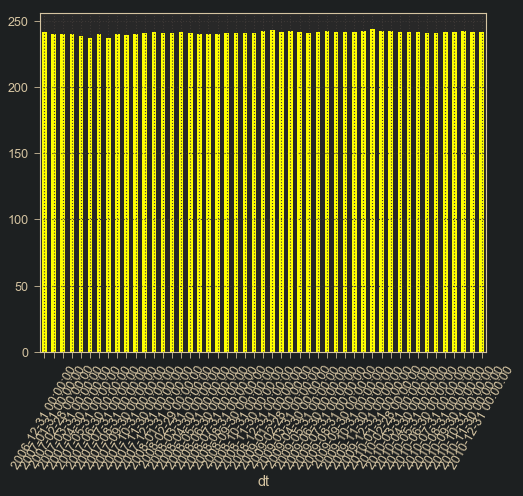

In [21]:
## 전압과 관련된 수치들 확인 (일정)
df['Voltage'].resample('M').mean().plot(kind='bar', color='yellow')
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

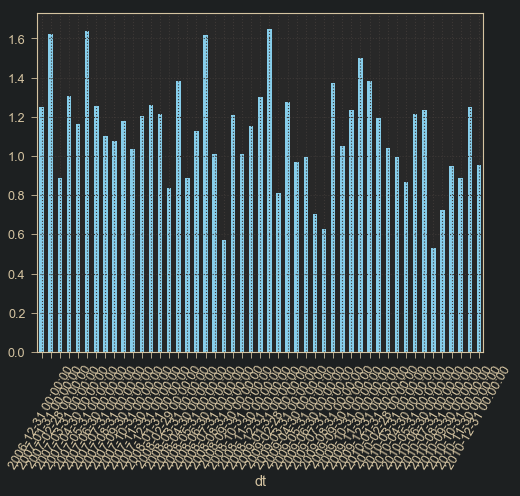

In [22]:
df['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='skyblue')
plt.xticks(rotation=60)


In [23]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [24]:
# df.info()
cols=[0,1,2,3,4,5,6]
values=df.resample('D').mean().values
values.shape
# 각각의 컬럼 별로 일단위로 값들에 대한 평균 

(1457, 7)

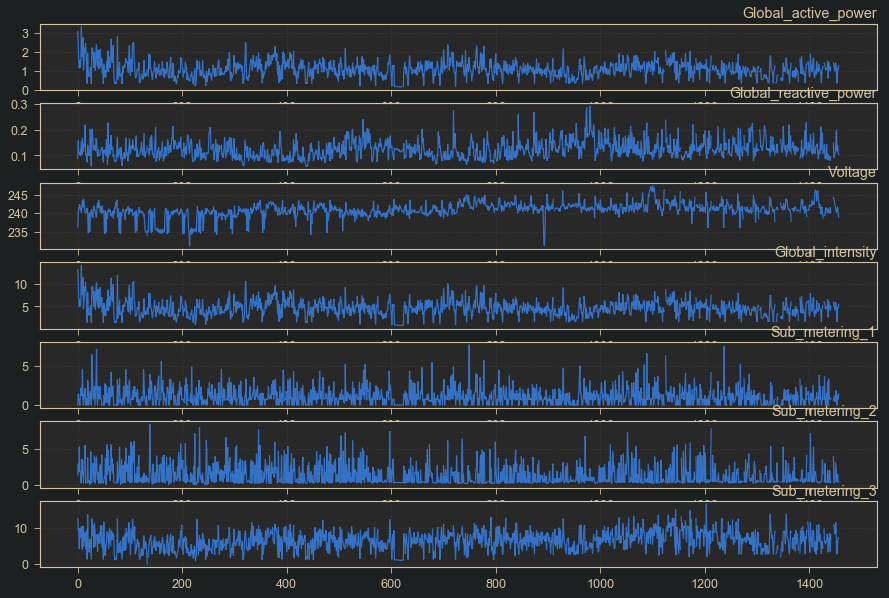

In [25]:
groups = cols
i= 1 
plt.figure(figsize = (15,10))
for group in groups:
    plt.subplot(len(cols), 1, i) # 7개로 나눠지고 i 해당위치에 floating 한다
    plt.title(df.columns[group], loc = 'right')
    plt.plot(values[:, group])
    i+=1
plt.show()
    # x 축 : day
    # data 의 column 단위로 평균구한거=== 일단위로 
    # data가 분단위로 
    

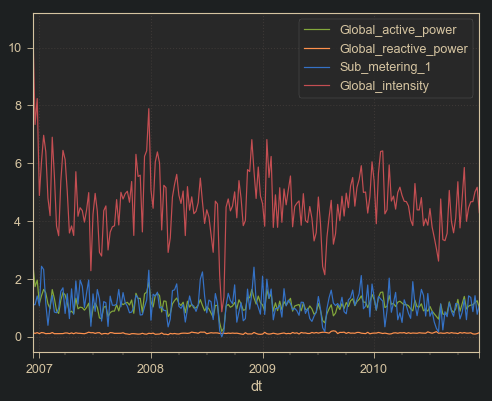

In [26]:
df.Global_active_power.resample('W').mean().plot(color='g', legend=True)
df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
df.Global_intensity.resample('W').mean().plot(color='r', legend=True)
plt.show()

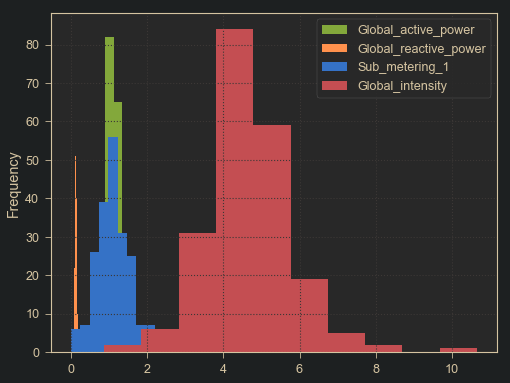

In [27]:
# 구간별 밀집도 
df.Global_active_power.resample('W').mean().plot(kind = 'hist', color='g', 
                                                 legend=True)
df.Global_reactive_power.resample('W').mean().plot(kind = 'hist',
                                                   color='y', legend=True)
df.Sub_metering_1.resample('W').mean().plot(kind = 'hist',
                                            color='b', legend=True)
df.Global_intensity.resample('W').mean().plot(kind = 'hist',
                                              color='r', legend=True)
plt.show() 

### data 에 대한 탐색적 분석 ( EDA ) 완료 

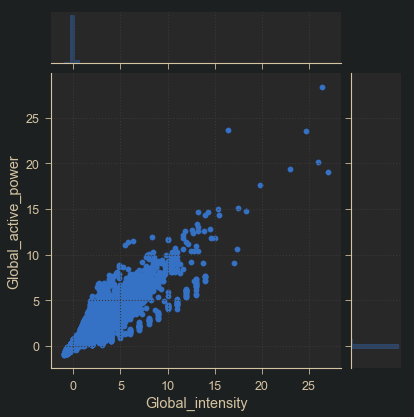

In [28]:
data_returns = df.pct_change() # percent 변화율
data_returns.head()
# data 변화하는 정도를 퍼센트로 반환한다 
# 이전 데이터와 비교하므로 
# 첫 번째 row가 비어있따 

# 이전데이터와 비교하여 퍼센트를 도출하는 함수 
# ex) 주가, 비트코인  
sns.jointplot( x = 'Global_intensity', 
              y = 'Global_active_power', 
              data=data_returns)
plt.show()

In [29]:
df.head() # 원본데이터 

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


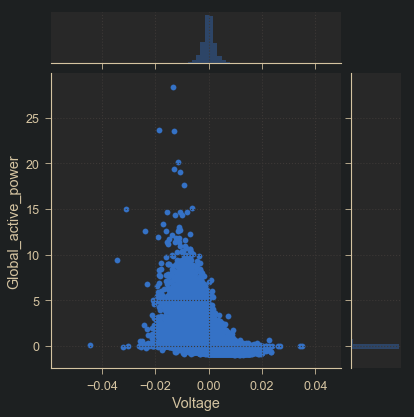

In [30]:
sns.jointplot( x = 'Voltage', 
              y = 'Global_active_power', 
              data=data_returns)
plt.show()

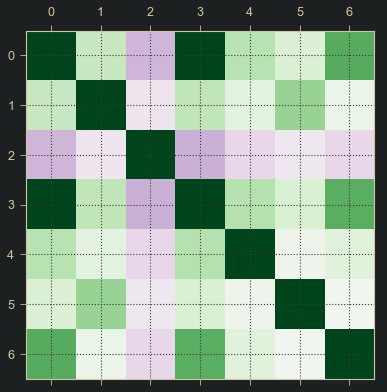

In [31]:
# df.corr(method='spearman')
plt.matshow(df.corr(method='spearman'), vmax=1, vmin=-1, cmap='PRGn')
plt.show()


In [32]:
drop_list_all=[]
for j in range(0, 7):
    if not df.iloc[:, j].notnull().all():
        drop_list_all.append(j)
drop_list_all
    # df.iloc[:, j].notnull() = j 열에 대해서 모두다 null이 아니냐 = > false 
    # => null이 있다 
    # j 의미 : null이 있는 컬럼의 번호  
    

[0, 1, 2, 3, 4, 5, 6]

In [33]:
print(df.isnull().sum())

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [34]:
# null값에 대한 처리 ...평균값으로 대체 
for j in range(0, 7):
    df.iloc[:, j] = df.iloc[:, j].fillna(df.iloc[:, j].mean())
    

In [35]:
df.isnull().sum() # null값처리 후 확인 

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [36]:
df_resample = df.resample('h').mean()
df_resample # 시간단위로 평균 구해
# resample을 통해 그룹화를 더욱 간편하게 진행시킬수 있다
df_resample.shape

(34951, 7)

In [37]:
values = df_resample.values
values  # array로 맨든다

array([[4.22288889e+00, 2.29000000e-01, 2.34643889e+02, ...,
        0.00000000e+00, 5.27777778e-01, 1.68611111e+01],
       [3.63220000e+00, 8.00333333e-02, 2.34580167e+02, ...,
        0.00000000e+00, 6.71666667e+00, 1.68666667e+01],
       [3.40023333e+00, 8.52333333e-02, 2.33232500e+02, ...,
        0.00000000e+00, 1.43333333e+00, 1.66833333e+01],
       ...,
       [1.11490000e+00, 8.58000000e-02, 2.36543667e+02, ...,
        8.55000000e+00, 4.50000000e-01, 0.00000000e+00],
       [3.20533333e-01, 7.62333333e-02, 2.40140667e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.39866667e-01, 4.97666667e-02, 2.43371500e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [38]:
from sklearn.preprocessing import *
from sklearn.model_selection import * 

In [39]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values) # scaling 작업시 호출함수
scaled


array([[0.63681623, 0.29573827, 0.33794529, ..., 0.        , 0.01136636,
        0.78241815],
       [0.54504495, 0.10335773, 0.33550078, ..., 0.        , 0.14465183,
        0.78267595],
       [0.50900588, 0.11007318, 0.28380167, ..., 0.        , 0.03086863,
        0.7741686 ],
       ...,
       [0.15394933, 0.11080499, 0.41082446, ..., 0.17677464, 0.00969131,
        0.        ],
       [0.03053403, 0.09845028, 0.54881238, ..., 0.        , 0.        ,
        0.        ],
       [0.08014666, 0.06427034, 0.67275343, ..., 0.        , 0.        ,
        0.        ]])

#### LSTM _ dropout 같은 걸 사용하여 node percentage 설정이 가능하다  
#### Overfitting 부분 처리도 필요
#### 역정규화 작업 필요 
#### => inverse_transform : 예측값에 대해 정규화이전값으로 도출되어짐


In [40]:
#global_active_power 예측
#평가방법:rmse
from sklearn.metrics import mean_squared_error
# rmse=np.sqrt(mean_squared_error(실제값, 예측값))
#실습문제(예측:global_active_power)


### - day 44 
### - solution Together